# Developing an AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load and preprocess the image dataset
* Train the image classifier on your dataset
* Use the trained classifier to predict image content

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

First up is importing the packages you'll need. It's good practice to keep all the imports at the beginning of your code. As you work through this notebook and find you need to import a package, make sure to add the import up here.

In [15]:
from PIL import Image
import numpy as np
import cv2
import glob, os

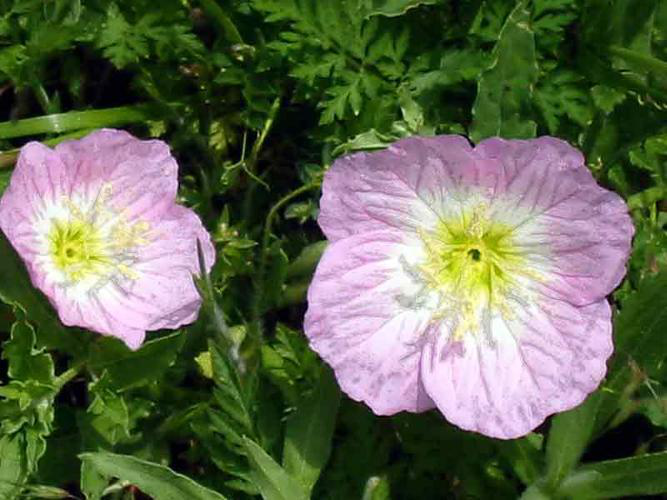

(667, 500)


In [104]:
file = "image_06750"
im = Image.open(file + ".jpg")
display(im)
print(im.size)

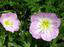

(64, 47)


In [105]:
size = 64, 64
im.thumbnail(size, Image.ANTIALIAS)
im.save(file + ".thumbnail", "JPEG")
img = Image.open("image_06750.thumbnail")
display(img)
print(img.size)

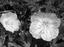

(64, 47)


In [140]:
#rgb_im = img.convert('RGB')
greyscale_img = img.convert('L')
display(greyscale_img)
print(greyscale_img.size)
greyscale_img.save("greyscale_img.jpg")


In [139]:
flower_pixel_row = []
for i in range(greyscale_img.size[0]):
    flower_pixel_col = []
    for j in range(greyscale_img.size[1]):
        x = greyscale_img.getpixel((i, j))
        flower_pixel_col.append(x)
        print(x, end = ' '),
    flower_pixel_row.append(flower_pixel_col)
    print("\n")

39 69 76 36 50 89 62 43 22 3 11 55 97 35 89 63 61 114 159 177 185 169 98 21 59 35 53 66 66 19 51 17 42 45 39 30 78 90 54 90 100 109 120 134 135 120 112 

51 50 47 33 61 89 61 53 33 22 28 72 62 18 103 99 152 175 190 190 198 202 169 126 27 41 41 38 87 58 58 61 63 58 57 82 121 101 60 80 85 85 99 117 119 108 92 

63 66 56 35 52 77 48 29 30 17 11 87 74 95 199 187 177 184 190 192 205 215 206 188 145 62 45 54 74 49 48 59 48 59 50 58 88 108 104 77 69 67 85 91 78 77 76 

57 44 51 68 70 41 27 49 40 26 11 106 70 128 220 193 177 184 199 216 229 231 227 223 217 182 139 52 33 52 45 50 80 70 51 71 79 81 97 61 98 104 119 94 45 52 90 

34 56 70 71 54 31 21 19 36 53 67 154 59 109 189 179 194 199 216 235 238 231 229 234 243 228 241 155 34 42 56 43 76 77 70 85 86 113 151 110 86 54 39 30 30 73 110 

60 54 58 79 58 8 3 5 13 29 85 164 78 132 190 190 188 197 221 238 232 206 192 196 218 246 235 219 177 112 33 53 37 7 40 108 86 36 40 43 20 21 30 25 17 52 99 

52 67 58 56 35 16 28 18 20 2 66 130 87 151 172 164 1

31 23 24 22 17 29 40 31 78 73 60 35 36 42 53 90 58 81 125 164 140 171 161 164 155 165 186 148 152 203 209 222 208 224 222 166 85 48 51 50 28 17 8 33 70 61 65 

38 45 42 34 40 51 40 21 57 76 50 44 63 47 34 42 47 49 118 176 145 162 167 166 174 170 157 95 91 148 161 166 174 121 69 63 76 66 42 27 9 8 6 35 63 53 56 

45 52 44 42 61 66 48 33 57 68 21 12 27 25 39 40 62 57 106 158 163 173 161 152 172 134 101 61 51 63 53 56 67 34 29 57 72 63 59 62 9 6 10 42 64 56 47 

32 29 24 38 64 71 64 67 31 45 22 22 25 29 52 36 21 26 79 109 124 136 128 107 75 53 52 61 65 57 43 49 32 45 73 72 56 72 65 13 5 4 20 46 55 49 36 

29 28 40 62 77 70 61 61 39 44 32 23 25 49 77 62 6 15 86 89 76 77 90 68 62 63 64 60 52 44 44 47 41 44 75 79 51 59 52 4 3 6 41 55 50 45 33 

40 46 67 79 69 64 57 43 48 49 38 16 35 74 76 72 45 60 107 80 87 72 80 79 89 86 64 47 37 37 48 46 52 35 49 69 68 73 78 63 15 15 52 59 50 50 36 

49 52 64 53 34 49 69 57 34 44 39 16 57 91 52 49 66 80 70 34 102 81 63 92 105 85 55 52 53 45 42 31 28 58 61 

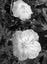

In [117]:
from PIL import Image
#print(flower_pixel_row)
array = np.array(flower_pixel_row, dtype=np.uint8)
im2 = Image.fromarray(array)
display(im2)

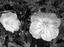

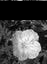

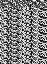

In [153]:
from PIL import Image
import numpy as np

def random_img(input_img, width, height):
    im = Image.open(input_img)
    display(im)
    rand = np.random.random((64,47)) 
    array[1:20] = 0
    img = Image.fromarray(array, 'L')
    display(img)

    new_arr = np.array(flower_pixel_row, dtype=np.uint8)
    noise = np.random.normal(0,1,47)
    new_arr = array + noise;
    im3 = Image.fromarray(new_arr, 'L')
    display(im3)


# 0 is the mean of the normal distribution you are choosing from
# 1 is the standard deviation of the normal distribution
# 100 is the number of elements you get in array noise
random_img('greyscale_img.jpg', 100, 50)

In [1]:
# Imports here
import torch
from torch import nn, optim
from collections import OrderedDict
import torch.nn.functional as F
from torchvision import transforms, datasets, models

## Load the data

Here you'll use `torchvision` to load the data ([documentation](http://pytorch.org/docs/0.3.0/torchvision/index.html)). The data should be included alongside this notebook, otherwise you can [download it here](https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz). The dataset is split into three parts, training, validation, and testing. For the training, you'll want to apply transformations such as random scaling, cropping, and flipping. This will help the network generalize leading to better performance. You'll also need to make sure the input data is resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet. For this you don't want any scaling or rotation transformations, but you'll need to resize then crop the images to the appropriate size.

The pre-trained networks you'll use were trained on the ImageNet dataset where each color channel was normalized separately. For all three sets you'll need to normalize the means and standard deviations of the images to what the network expects. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`, calculated from the ImageNet images.  These values will shift each color channel to be centered at 0 and range from -1 to 1.
 

In [2]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [3]:
# TODO: Define your transforms for the training, validation, and testing sets
#Define the training transformations for better generalization
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(0.5),
                               transforms.RandomVerticalFlip(0.5),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomGrayscale(0.1),
                                transforms.RandomRotation(30),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406],
                                                    [0.229, 0.224, 0.225])])

#Define thte testing and validation transforms so that the images we compare to are normalized                                 
valid_transform = transforms.Compose([transforms.Resize(225),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

test_transform = valid_transform


# TODO: Load the datasets with ImageFolder
#Import data and manipulate with appropriate transforms
training_set = datasets.ImageFolder(train_dir, transform = train_transform)
valid_set = datasets.ImageFolder(valid_dir, transform = valid_transform)
test_set = datasets.ImageFolder(test_dir, transform = test_transform)

# TODO: Using the image datasets and the trainforms, define the dataloaders
trainloader = torch.utils.data.DataLoader(training_set, batch_size = 64, shuffle = True)
validloader = torch.utils.data.DataLoader(valid_set, batch_size = 64)
testloader = torch.utils.data.DataLoader(test_set, batch_size = 64)

### Label mapping

You'll also need to load in a mapping from category label to category name. You can find this in the file `cat_to_name.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/2/library/json.html). This will give you a dictionary mapping the integer encoded categories to the actual names of the flowers.

In [4]:
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

# Building and training the classifier

Now that the data is ready, it's time to build and train the classifier. As usual, you should use one of the pretrained models from `torchvision.models` to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. Refer to [the rubric](https://review.udacity.com/#!/rubrics/1663/view) for guidance on successfully completing this section. Things you'll need to do:

* Load a [pre-trained network](http://pytorch.org/docs/master/torchvision/models.html) (If you need a starting point, the VGG networks work great and are straightforward to use)
* Define a new, untrained feed-forward network as a classifier, using ReLU activations and dropout
* Train the classifier layers using backpropagation using the pre-trained network to get the features
* Track the loss and accuracy on the validation set to determine the best hyperparameters

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right. Make sure to try different hyperparameters (learning rate, units in the classifier, epochs, etc) to find the best model. Save those hyperparameters to use as default values in the next part of the project.

One last important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to
GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module.

**Note for Workspace users:** If your network is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. Typically this happens with wide dense layers after the convolutional layers. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [5]:
# TODO: Build and train your networka
#Import the resnet model, make sure it is pretrained, and check for shape
model = models.densenet121(pretrained = True)
#print(model)
#model

In [6]:
for param in model.parameters():
    param.requires_grad = False
    
#Define a class to train the downloaded model so that we can crosswalk to our 102 flower outputs
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Define the Linear combinations 
        
        self.fc1 = nn.Linear(1024,850)
        self.fc2 = nn.Linear(850,512)
        #self.fc3 = nn.Linear(600,400)
        #self.fc4 = nn.Linear(400,200)
        #self.fc5 = nn.Linear(600,400)
        #self.fc6 = nn.Linear(400,300)
        #self.fc7 = nn.Linear(300,200)
        
        #Have the last linear combo be defined by "output" so that editing layers is quicker
        self.output = nn.Linear(512,102)
        
        #Define node dropout with a probability of 20% for better training 
        self.dropout = nn.Dropout(p=0.2)
    
    #Define the feedforward process for passing data through the network
    def forward(self, x):
        #Flatten data for training
        #x = x.view(x.shape[0],-1)
                
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        #x = self.dropout(F.relu(self.fc3(x)))
        #x = self.dropout(F.relu(self.fc4(x)))
        #x = self.dropout(F.relu(self.fc5(x)))
        #x = self.dropout(F.relu(self.fc6(x)))
        #x = self.dropout(F.relu(self.fc7(x)))
        
        x = F.log_softmax(self.output(x), dim = 1)
        
        return x

model.classifier = Network()

In [7]:
# Define the model classifier as our own constructed classifier and then assign criterion and optimizer variables
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr = 0.003)
epochs = 1

# Define the device to use based on whether or not the GPU is enabled, and then make sure the model is told to use that device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

#Start the epoch loop
for e in range(epochs):
    
    #Zero out the training loss, which will be tracked in total for each epoch
    training_loss = 0
    
    #Loop through the images and labels in the trainloader batches
    for images, labels in trainloader:
        
        #Switch the images and labels to the gpu, if enabled
        images,labels = images.to(device), labels.to(device)
        
        #Zero out optimizer so that we make correct adjustments to weights and biases based on current gradients
        optimizer.zero_grad()
        
        #Run images through training model, calculate loss, and backpropagate loss through the network
        logittrain = model(images)
        loss = criterion(logittrain, labels)
        loss.backward()
        
        #Adjust weights and biases for each node based on loss gradients
        optimizer.step()
        
        #Add loss to arrive at an average loss of each epoch
        training_loss += loss.item()
        
    else:
        
        #Turn off the dropout for the testloader
        model.eval()
        
        #Zero out the testing loss and accuracy , which will be tracked in total for each epoch
        testing_loss = 0
        accuracy = 0
        
        #Turn off gradient tracking to speed up code
        with torch.no_grad():
            
            #Loop through the images and labels in the validation batches
            for images, labels in validloader:
                
                #Switch the images and labels to the gpu, if enabled
                images,labels = images.to(device), labels.to(device)
                
                #Run images through model and calculate loss
                logittest = model(images)
                batch_loss = criterion(logittest,labels)
                
                #Add loss to arrive at an average loss of each epoch
                testing_loss += batch_loss.item()
                
                #Find the acutal values the model is producing for the validation images
                prob = torch.exp(logittest)
                
                #Take the most likely validation value and separate that class from the probability it occurs
                top_prob, top_class = prob.topk(1,dim=1)
                
                #check how often the top predicted class equals the label (true positive) for each image
                equality = top_class == labels.view(*top_class.shape)
                
                #check the average for the amount the top_class equals the label
                accuracy += torch.mean(equality.type(torch.FloatTensor)).item()
        
        #print out the various statistics, and make sure losses are generally decreasing while accuracy is generally increasing
        print(f"Epoch: {e+1}.." 
              f"Training loss: {training_loss / len(trainloader):0.4f}.. "
              f"Validation loss: {testing_loss / len(validloader):0.4f}.. "
              f"Validation accuracy: {accuracy / len(validloader):0.4f}")
        
        #Turn the dropout back on for further training
        model.train()

Epoch: 1..Training loss: 3.6136.. Validation loss: 2.1989.. Validation accuracy: 0.4314
Epoch: 2..Training loss: 2.2497.. Validation loss: 1.5935.. Validation accuracy: 0.5773
Epoch: 3..Training loss: 1.8053.. Validation loss: 1.4003.. Validation accuracy: 0.6073
Epoch: 4..Training loss: 1.6853.. Validation loss: 1.0467.. Validation accuracy: 0.7187
Epoch: 5..Training loss: 1.5325.. Validation loss: 1.0236.. Validation accuracy: 0.7170


## Testing your network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. Run the test images through the network and measure the accuracy, the same way you did validation. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [8]:
#Run the same code as last step, but replace the validation images with the test images to make sure the code generalizes well
for e in range(2):
    
    training_loss = 0
    
    for images, labels in trainloader:
        images,labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logittrain = model(images)
        loss = criterion(logittrain, labels)
        loss.backward()
        
        optimizer.step()
        
        training_loss += loss.item()
        
    else:
        
        #Turn off the dropout for the testloader
        model.eval()
        testing_loss = 0
        accuracy = 0
        
        #Turn off gradient tracking to speed up code
        with torch.no_grad():
            for images, labels in testloader:
                images,labels = images.to(device), labels.to(device)
                
                logittest = model(images)
                batch_loss = criterion(logittest,labels)
                
                testing_loss += batch_loss.item()
                
                prob = torch.exp(logittest)
                top_prob, top_class = prob.topk(1,dim=1)
                equality = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equality.type(torch.FloatTensor)).item()
                
        print(f"Epoch: {e+1}.." 
              f"Training loss: {training_loss / len(trainloader):0.4f}.. "
              f"Testing loss: {testing_loss / len(testloader):0.4f}.. "
              f"Testing accuracy: {accuracy / len(testloader):0.4f}")
        model.train()

Epoch: 1..Training loss: 1.4631.. Testing loss: 0.9563.. Testing accuracy: 0.7304
Epoch: 2..Training loss: 1.3970.. Testing loss: 1.0381.. Testing accuracy: 0.7225


## Save the checkpoint

Now that your network is trained, save the model so you can load it later for making predictions. You probably want to save other things such as the mapping of classes to indices which you get from one of the image datasets: `image_datasets['train'].class_to_idx`. You can attach this to the model as an attribute which makes inference easier later on.

```model.class_to_idx = image_datasets['train'].class_to_idx```

Remember that you'll want to completely rebuild the model later so you can use it for inference. Make sure to include any information you need in the checkpoint. If you want to load the model and keep training, you'll want to save the number of epochs as well as the optimizer state, `optimizer.state_dict`. You'll likely want to use this trained model in the next part of the project, so best to save it now.

In [17]:
# TODO: Save the checkpoint 


checkpoint = {'classifier': model.classifier,
    'optimizer': optimizer,
    'arch': "densenet121",#assuming you are using vgg16
    'state_dict': model.state_dict(),
    'optimizer_dict': optimizer.state_dict(),
    'class_to_idx': training_set.class_to_idx
}

torch.save(checkpoint, 'checkpoint0126.py')

/opt/conda/lib/python3.6/site-packages/torch/serialization.py:193: UserWarning: Couldn't retrieve source code for container of type Network. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


## Loading the checkpoint

At this point it's good to write a function that can load a checkpoint and rebuild the model. That way you can come back to this project and keep working on it without having to retrain the network.

In [18]:
# TODO: Write a function that loads a checkpoint and rebuilds the model
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model.class_to_idx = checkpoint['class_to_idx']
    model.classifier = checkpoint['classifier']
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_dict'])
    
    for param in model.parameters():
        param.requires_grad = False
        
    return model



In [19]:
model1 = load_checkpoint('checkpoint0126.pth')
print(model1)

FileNotFoundError: [Errno 2] No such file or directory: 'checkpoint0126.pth'

# Inference for classification

Now you'll write a function to use a trained network for inference. That is, you'll pass an image into the network and predict the class of the flower in the image. Write a function called `predict` that takes an image and a model, then returns the top $K$ most likely classes along with the probabilities. It should look like 

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

First you'll need to handle processing the input image such that it can be used in your network. 

## Image Preprocessing

You'll want to use `PIL` to load the image ([documentation](https://pillow.readthedocs.io/en/latest/reference/Image.html)). It's best to write a function that preprocesses the image so it can be used as input for the model. This function should process the images in the same manner used for training. 

First, resize the images where the shortest side is 256 pixels, keeping the aspect ratio. This can be done with the [`thumbnail`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) or [`resize`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) methods. Then you'll need to crop out the center 224x224 portion of the image.

Color channels of images are typically encoded as integers 0-255, but the model expected floats 0-1. You'll need to convert the values. It's easiest with a Numpy array, which you can get from a PIL image like so `np_image = np.array(pil_image)`.

As before, the network expects the images to be normalized in a specific way. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`. You'll want to subtract the means from each color channel, then divide by the standard deviation. 

And finally, PyTorch expects the color channel to be the first dimension but it's the third dimension in the PIL image and Numpy array. You can reorder dimensions using [`ndarray.transpose`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.transpose.html). The color channel needs to be first and retain the order of the other two dimensions.

In [12]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    # TODO: Process a PIL image for use in a PyTorch model
    from PIL import Image
    image1 = Image.open(image)
    print('hey')
    imshow(image1)

To check your work, the function below converts a PyTorch tensor and displays it in the notebook. If your `process_image` function works, running the output through this function should return the original image (except for the cropped out portions).

In [14]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

## Class Prediction

Once you can get images in the correct format, it's time to write a function for making predictions with your model. A common practice is to predict the top 5 or so (usually called top-$K$) most probable classes. You'll want to calculate the class probabilities then find the $K$ largest values.

To get the top $K$ largest values in a tensor use [`x.topk(k)`](http://pytorch.org/docs/master/torch.html#torch.topk). This method returns both the highest `k` probabilities and the indices of those probabilities corresponding to the classes. You need to convert from these indices to the actual class labels using `class_to_idx` which hopefully you added to the model or from an `ImageFolder` you used to load the data ([see here](#Save-the-checkpoint)). Make sure to invert the dictionary so you get a mapping from index to class as well.

Again, this method should take a path to an image and a model checkpoint, then return the probabilities and classes.

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

In [15]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    
    # TODO: Implement the code to predict the class from an image file
    

## Sanity Checking

Now that you can use a trained model for predictions, check to make sure it makes sense. Even if the testing accuracy is high, it's always good to check that there aren't obvious bugs. Use `matplotlib` to plot the probabilities for the top 5 classes as a bar graph, along with the input image. It should look like this:

<img src='assets/inference_example.png' width=300px>

You can convert from the class integer encoding to actual flower names with the `cat_to_name.json` file (should have been loaded earlier in the notebook). To show a PyTorch tensor as an image, use the `imshow` function defined above.

In [16]:
# TODO: Display an image along with the top 5 classes